# MyAnimeList Data Science Project



You are probably familiar with what an anime is, japanese cartoon, in short terms. Well, MyAnimeList (MAL) is an online platform in which everybody can create themselves a list with 4 categories: Plan to Wacth, On hold, Watching and Dropped. In each respective category users put their anime and can give it a score from 1 to 10. On top of that, MAL has a huuge Database consisting of 23 000 anime and 62 000 manga entries (according to Wikipedia). In this project our focus will be on what makes an anime good and the entries and infromation behind it (If you go on the page of a random anime, you can see its title, overall score, its rank, popularity and members, who have added it in their list). Now that you have a brief overview of what MAL is, let's start with this project:

- getting to know the anime dataframe
- improving quality of the data ( feature selection and extraction)
- plotting
- brightness of posters
- loading user dataframe
- creating a map
- prediction model

In [145]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import skimage.io
from skimage.io import imread, imshow
import os
import numpy as np
from geopy.geocoders import Nominatim
import geopandas as gpd
import geodatasets

from shapely.geometry import Point

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
pd.options.mode.chained_assignment = None


The dataset, that I have downloaded is huge, the only problem is that it's from 2018, but that won't play a significant role in this project.

In [146]:
anime  = pd.read_csv("anime info/AnimeList.csv")

Let's take a look at the dataframe

In [147]:
anime

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ..."
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,...,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi..."
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,...,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ..."
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,...,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ..."
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,...,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14473,26089,Gutchonpa Omoshiro Hanashi,NaN,グッチョンパおもしろ話,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Unknown,5,Finished Airing,...,NaN,Fall 1987,Unknown,"{'Other': [{'mal_id': 26087, 'type': 'anime', ...",NaN,NaN,NaN,Kids,[],[]
14474,21525,Geba Geba Shou Time!,NaN,ゲバゲバ笑タイム!,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Unknown,1,Finished Airing,...,NaN,NaN,NaN,[],Studio Lotus,NaN,NaN,Comedy,[],[]
14475,37897,Godzilla: Hoshi wo Kuu Mono,NaN,GODZILLA -星を喰う者-,"Godzilla Part 3, Godzilla: Eater of Stars",https://myanimelist.cdn-dena.com/images/anime/...,Movie,Other,1,Not yet aired,...,NaN,NaN,NaN,"{'Prequel': [{'mal_id': 36816, 'type': 'anime'...",NaN,NaN,NaN,"Action, Sci-Fi, Adventure, Fantasy",[],[]
14476,34193,Nippon Mukashibanashi: Sannen Netarou,NaN,日本昔ばなし 三ねん寝太郎,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Other,1,Finished Airing,...,NaN,NaN,NaN,[],NaN,NaN,NaN,"Fantasy, Kids",[],[]


We have a lot of NaN values as you can see. Let's look at the columns and get rid of some if needed

In [148]:
anime.columns

Index(['anime_id', 'title', 'title_english', 'title_japanese',
       'title_synonyms', 'image_url', 'type', 'source', 'episodes', 'status',
       'airing', 'aired_string', 'aired', 'duration', 'rating', 'score',
       'scored_by', 'rank', 'popularity', 'members', 'favorites', 'background',
       'premiered', 'broadcast', 'related', 'producer', 'licensor', 'studio',
       'genre', 'opening_theme', 'ending_theme'],
      dtype='object')

Okay, so anime_id won't be that useful. It shows us the order in which animes are added to the database (no matter the year of airing). But let's take a look at the first few ids by taking only the anime_id and the title of the anime, then we will sort the result and use .head(10) to see the first 10 added anime.

In [149]:
anime[["anime_id","title","aired"]].sort_values("anime_id").head(10)

,anime_id,title,aired
9132,1,Cowboy Bebop,"{'from': '1998-04-03', 'to': '1999-04-24'}"
10873,5,Cowboy Bebop: Tengoku no Tobira,"{'from': '2001-09-01', 'to': '2001-09-01'}"
5399,6,Trigun,"{'from': '1998-04-01', 'to': '1998-09-30'}"
10039,7,Witch Hunter Robin,"{'from': '2002-07-02', 'to': '2002-12-24'}"
9308,8,Beet the Vandel Buster,"{'from': '2004-09-30', 'to': '2005-09-29'}"
5885,15,Eyeshield 21,"{'from': '2005-04-06', 'to': '2008-03-19'}"
1135,16,Hachimitsu to Clover,"{'from': '2005-04-15', 'to': '2005-09-27'}"
870,17,Hungry Heart: Wild Striker,"{'from': '2002-09-11', 'to': '2003-09-10'}"
345,18,Initial D Fourth Stage,"{'from': '2004-04-17', 'to': '2006-02-18'}"
7624,19,Monster,"{'from': '2004-04-07', 'to': '2005-09-28'}"


Firstly we can see that the aired date does not play a role in the number of the id. Secondly we see that the ids are missing some numbers (2,3,4,12 ...), and lastly why is Cowboy Bebop and Trigun one of the first animes added? By simple logic, the creator of MAL probably set the first ids, because MAL wasn't really a popular site back then, so it was his manual work :). Shall we prove it? https://myanimelist.net/profile/Xinil -> this is the profile of the founder of this site, and his favorite animes are in fact Cowboy Bebop and Trigun. Such a coincidence :D! Our work with anime_id is done. Image_url is one interesting column, but the problem is that most of the urls are not working.

In [150]:
for i in range(10):
    print(anime["image_url"][i])

https://myanimelist.cdn-dena.com/images/anime/12/35893.jpg
https://myanimelist.cdn-dena.com/images/anime/13/58383.jpg
https://myanimelist.cdn-dena.com/images/anime/11/10645.jpg
https://myanimelist.cdn-dena.com/images/anime/13/32209.jpg
https://myanimelist.cdn-dena.com/images/anime/6/41845.jpg
https://myanimelist.cdn-dena.com/images/anime/12/21674.jpg
https://myanimelist.cdn-dena.com/images/anime/8/53571.jpg
https://myanimelist.cdn-dena.com/images/anime/10/18669.jpg
https://myanimelist.cdn-dena.com/images/anime/4/11918.jpg
https://myanimelist.cdn-dena.com/images/anime/2/71992.jpg


So we will be removing anime_id, image_url, background and related ( won't be useful for the project)

In [151]:
anime = anime.drop(columns=["anime_id","image_url","background","related"])

In [152]:
anime.columns = anime.columns.astype("string")

In [153]:
anime.columns

Index(['title', 'title_english', 'title_japanese', 'title_synonyms', 'type',
       'source', 'episodes', 'status', 'airing', 'aired_string', 'aired',
       'duration', 'rating', 'score', 'scored_by', 'rank', 'popularity',
       'members', 'favorites', 'premiered', 'broadcast', 'producer',
       'licensor', 'studio', 'genre', 'opening_theme', 'ending_theme'],
      dtype='string')

a little bit better :)

Now let's get to more serious work. Let's find out which is the most ocurring genre in the anime industry. In my experince it should be the action genre or fantasy. Everybody that has heard of anime always thinks of fights and mythical creatures, so why not? Let's show only the title of the anime and its genre.

In [154]:
title_genre = anime[["title","genre"]]

In [155]:
title_genre

,title,genre
0,Inu x Boku SS,"Comedy, Supernatural, Romance, Shounen"
1,Seto no Hanayome,"Comedy, Parody, Romance, School, Shounen"
2,Shugo Chara!! Doki,"Comedy, Magic, School, Shoujo"
3,Princess Tutu,"Comedy, Drama, Magic, Romance, Fantasy"
4,Bakuman. 3rd Season,"Comedy, Drama, Romance, Shounen"
...,...,...
14473,Gutchonpa Omoshiro Hanashi,Kids
14474,Geba Geba Shou Time!,Comedy
14475,Godzilla: Hoshi wo Kuu Mono,"Action, Sci-Fi, Adventure, Fantasy"
14476,Nippon Mukashibanashi: Sannen Netarou,"Fantasy, Kids"


In [156]:
anime.genre.unique()

array(['Comedy, Supernatural, Romance, Shounen',
       'Comedy, Parody, Romance, School, Shounen',
       'Comedy, Magic, School, Shoujo', ..., 'Music, Romance, Seinen',
       'Historical, Kids, Sci-Fi', 'Game, Magic'], dtype=object)

That's bad. The values in the genre column are mostly a lot of genres in a string. The dtype is also object. Will there be hidden NaN values?

In [157]:
title_genre[title_genre.genre.isna()]

,title,genre
88,Metropolis (2009),NaN
135,Yaseruyagi,NaN
745,Blend,NaN
1120,Hokori Inu no Hanashi,NaN
1165,Mabeob Chunjamun: Daemawangui Buhwaleul Magala,NaN
...,...,...
14036,Season&#039;s Greetings 2017 from Dwarf,NaN
14115,Xing Fu Lu Shang,NaN
14137,Ikite Iru,NaN
14306,Aesop Douwa,NaN


Well, at least they are only 64. For this case we should remove them sadly :(.

In [158]:
title_genre = title_genre.dropna()

In [159]:
title_genre

,title,genre
0,Inu x Boku SS,"Comedy, Supernatural, Romance, Shounen"
1,Seto no Hanayome,"Comedy, Parody, Romance, School, Shounen"
2,Shugo Chara!! Doki,"Comedy, Magic, School, Shoujo"
3,Princess Tutu,"Comedy, Drama, Magic, Romance, Fantasy"
4,Bakuman. 3rd Season,"Comedy, Drama, Romance, Shounen"
...,...,...
14473,Gutchonpa Omoshiro Hanashi,Kids
14474,Geba Geba Shou Time!,Comedy
14475,Godzilla: Hoshi wo Kuu Mono,"Action, Sci-Fi, Adventure, Fantasy"
14476,Nippon Mukashibanashi: Sannen Netarou,"Fantasy, Kids"


Now, let's try somehow to seperate each genre. We will write some code which will create n instances of the title of the anime, where n is the number of genres of the specific anime.

In [160]:
list_of_genres = []
list_titles = []
for genres,title in zip(title_genre.genre,title_genre.title):
    for genre in genres.split(","):
        list_titles.append(title)
        list_of_genres.append(genre)

In [161]:
title_genre = pd.DataFrame({'genre': list_of_genres, 'title': list_titles})

In [162]:
title_genre

,genre,title
0,Comedy,Inu x Boku SS
1,Supernatural,Inu x Boku SS
2,Romance,Inu x Boku SS
3,Shounen,Inu x Boku SS
4,Comedy,Seto no Hanayome
...,...,...
41964,Adventure,Godzilla: Hoshi wo Kuu Mono
41965,Fantasy,Godzilla: Hoshi wo Kuu Mono
41966,Fantasy,Nippon Mukashibanashi: Sannen Netarou
41967,Kids,Nippon Mukashibanashi: Sannen Netarou


Perfect, now let's see how many genres are there

In [163]:
title_genre.genre.unique()

array(['Comedy', ' Supernatural', ' Romance', ' Shounen', ' Parody',
       ' School', ' Magic', ' Shoujo', ' Drama', ' Fantasy', 'Kids',
       'Magic', ' Comedy', 'Action', 'Music', ' Slice of Life', ' Josei',
       ' Harem', ' Shounen Ai', 'Slice of Life', ' Adventure',
       ' Super Power', 'Sci-Fi', ' Ecchi', ' Seinen', ' Martial Arts',
       'Drama', ' Game', ' Sports', ' Demons', ' Historical', 'Adventure',
       'Ecchi', ' Music', ' Horror', ' Mystery', ' Sci-Fi', ' Samurai',
       'Hentai', ' Kids', ' Space', ' Mecha', ' Psychological', 'Police',
       'Harem', ' Vampire', ' Military', 'Space', 'Mecha', 'Game',
       ' Thriller', 'Fantasy', ' Hentai', ' Yaoi', 'Cars', ' Shoujo Ai',
       'Mystery', ' Police', 'Supernatural', 'Sports', 'Romance',
       'Shounen', 'Dementia', 'Historical', 'Psychological', ' Dementia',
       ' Cars', 'Military', 'School', 'Parody', 'Demons', 'Martial Arts',
       'Horror', 'Shoujo', 'Samurai', 'Seinen', 'Vampire', ' Yuri',
       'Thr

Okay, too many genres. We can see that there is a mistake in some strings " Comedy" != "Comedy". Let's fix this by using .strip()

In [164]:
title_genre.genre = title_genre.genre.str.strip()

Lastly, let's group everything by genre, count how many times the specific genre occurs and sort in descending order

In [165]:
title_genre.groupby("genre").count().sort_values("title",ascending=False)

,title
genre,
Comedy,5251
Action,3253
Fantasy,2703
Adventure,2582
Drama,2294
Sci-Fi,2272
Kids,2003
Shounen,1771
Romance,1634


In [166]:
count_of_genre = title_genre.groupby("genre").count().sort_values("title",ascending=False)

To be sure, let's just check MAL  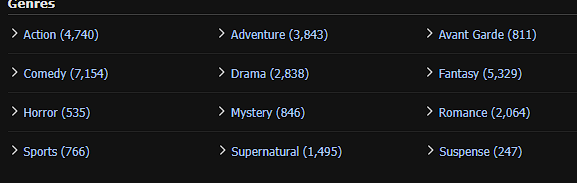

Again, this is a dataframe from 2018 ,so numbers change, genres also for some reason. We can also see that fantasy animes are more than the action ones now, while in 2018 things were different. Okay, so I was wrong, Comedy is the most occurring genre. 

I forgot to do something though. I wanted to see the scores of the animes in title_genre, but now I should change a lot of stuff in order to do that. So let's find a solution

In [167]:
scores = []
for i in title_genre.title:
    scores.append(anime[anime.title==i].score.iloc[0])

In [168]:
title_genre["score"] = scores

In [169]:
title_genre

,genre,title,score
0,Comedy,Inu x Boku SS,7.63
1,Supernatural,Inu x Boku SS,7.63
2,Romance,Inu x Boku SS,7.63
3,Shounen,Inu x Boku SS,7.63
4,Comedy,Seto no Hanayome,7.89
...,...,...,...
41964,Adventure,Godzilla: Hoshi wo Kuu Mono,0.00
41965,Fantasy,Godzilla: Hoshi wo Kuu Mono,0.00
41966,Fantasy,Nippon Mukashibanashi: Sannen Netarou,6.00
41967,Kids,Nippon Mukashibanashi: Sannen Netarou,6.00


Nice, let's try and see which genre has the highest score, place your bets now :D (I am betting on seinen or thriller). First let's remove these zeros from the scores, because they will make a mess later on

In [170]:
title_genre = title_genre[title_genre.score !=0]

In [171]:
sorted(title_genre.score.unique(),reverse=True)

[10.0,
 9.52,
 9.5,
 9.25,
 9.2,
 9.19,
 9.15,
 9.14,
 9.11,
 9.1,
 9.07,
 9.04,
 9.02,
 9.01,
 8.99,
 8.95,
 8.92,
 8.91,
 8.88,
 8.87,
 8.85,
 8.83,
 8.81,
 8.8,
 8.79,
 8.77,
 8.76,
 8.75,
 8.74,
 8.73,
 8.72,
 8.71,
 8.69,
 8.67,
 8.66,
 8.65,
 8.64,
 8.63,
 8.62,
 8.6,
 8.59,
 8.58,
 8.57,
 8.56,
 8.55,
 8.54,
 8.53,
 8.52,
 8.51,
 8.5,
 8.49,
 8.48,
 8.47,
 8.46,
 8.45,
 8.44,
 8.43,
 8.42,
 8.41,
 8.4,
 8.39,
 8.38,
 8.37,
 8.36,
 8.35,
 8.34,
 8.33,
 8.32,
 8.31,
 8.3,
 8.29,
 8.28,
 8.27,
 8.26,
 8.25,
 8.24,
 8.23,
 8.22,
 8.21,
 8.2,
 8.19,
 8.18,
 8.17,
 8.16,
 8.15,
 8.14,
 8.13,
 8.12,
 8.11,
 8.1,
 8.09,
 8.08,
 8.07,
 8.06,
 8.05,
 8.04,
 8.03,
 8.02,
 8.01,
 8.0,
 7.99,
 7.98,
 7.97,
 7.96,
 7.95,
 7.94,
 7.93,
 7.92,
 7.91,
 7.9,
 7.89,
 7.88,
 7.87,
 7.86,
 7.85,
 7.84,
 7.83,
 7.82,
 7.81,
 7.8,
 7.79,
 7.78,
 7.77,
 7.76,
 7.75,
 7.74,
 7.73,
 7.72,
 7.71,
 7.7,
 7.69,
 7.68,
 7.67,
 7.66,
 7.65,
 7.64,
 7.63,
 7.62,
 7.61,
 7.6,
 7.59,
 7.58,
 7.57,
 7.56,
 7.55,


Let's remove the 10s too

In [172]:
title_genre = title_genre[title_genre.score !=10]

In [173]:
genre_score = title_genre.groupby("genre").score.mean().sort_values(ascending=False).round(2)

In [174]:
genre_score

genre
Josei            7.17
Thriller         7.16
Mystery          7.13
Police           7.02
Shounen          7.01
Romance          6.94
Psychological    6.93
Harem            6.92
Seinen           6.91
Military         6.90
Vampire          6.90
Supernatural     6.90
School           6.89
Shoujo Ai        6.88
Shounen Ai       6.87
Drama            6.85
Shoujo           6.83
Super Power      6.80
Martial Arts     6.73
Action           6.73
Magic            6.73
Sports           6.69
Samurai          6.65
Adventure        6.64
Sci-Fi           6.60
Ecchi            6.60
Demons           6.58
Slice of Life    6.57
Space            6.57
Mecha            6.56
Fantasy          6.56
Historical       6.53
Comedy           6.50
Game             6.45
Yaoi             6.42
Horror           6.27
Hentai           6.17
Parody           6.16
Cars             6.05
Yuri             6.03
Kids             5.73
Music            5.52
Dementia         4.98
Name: score, dtype: float64

Okay, nice I was wrong again. But we have some good information. Let's plot it in some interesting ways.

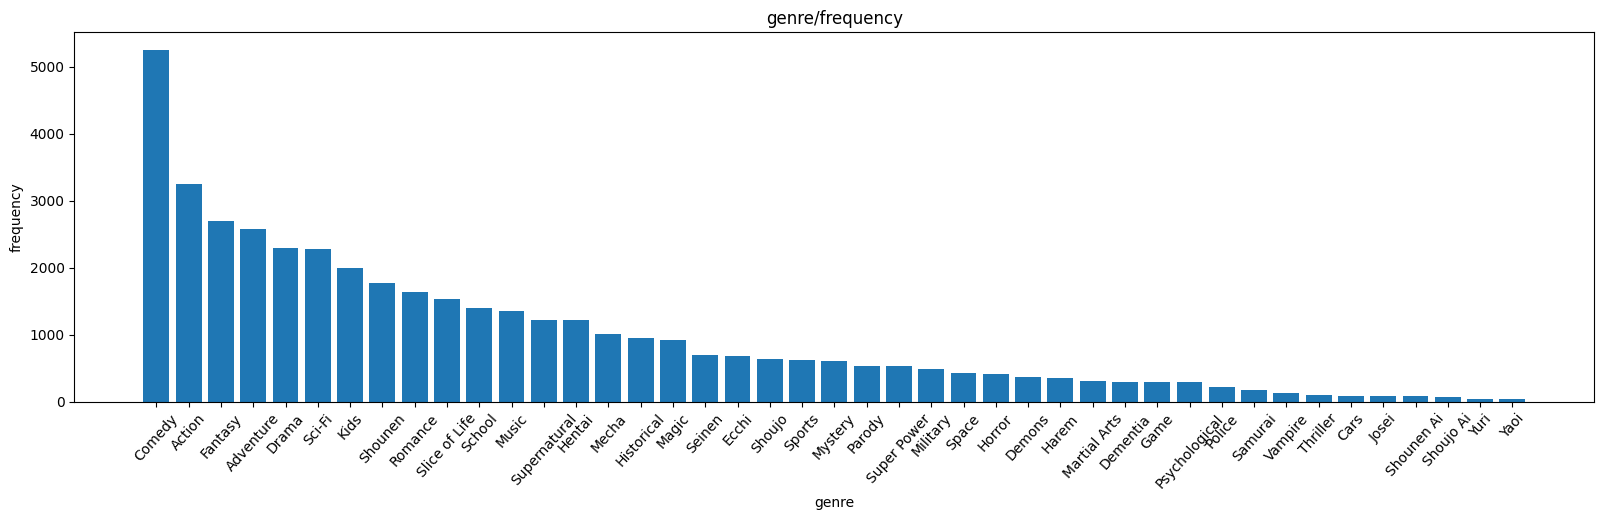

In [175]:
plt.bar(count_of_genre.index,count_of_genre.title)
plt.subplots_adjust(right=2.5)
plt.xticks(rotation=48)
plt.ylabel("frequency")
plt.xlabel("genre")
plt.title("genre/frequency")
plt.show()

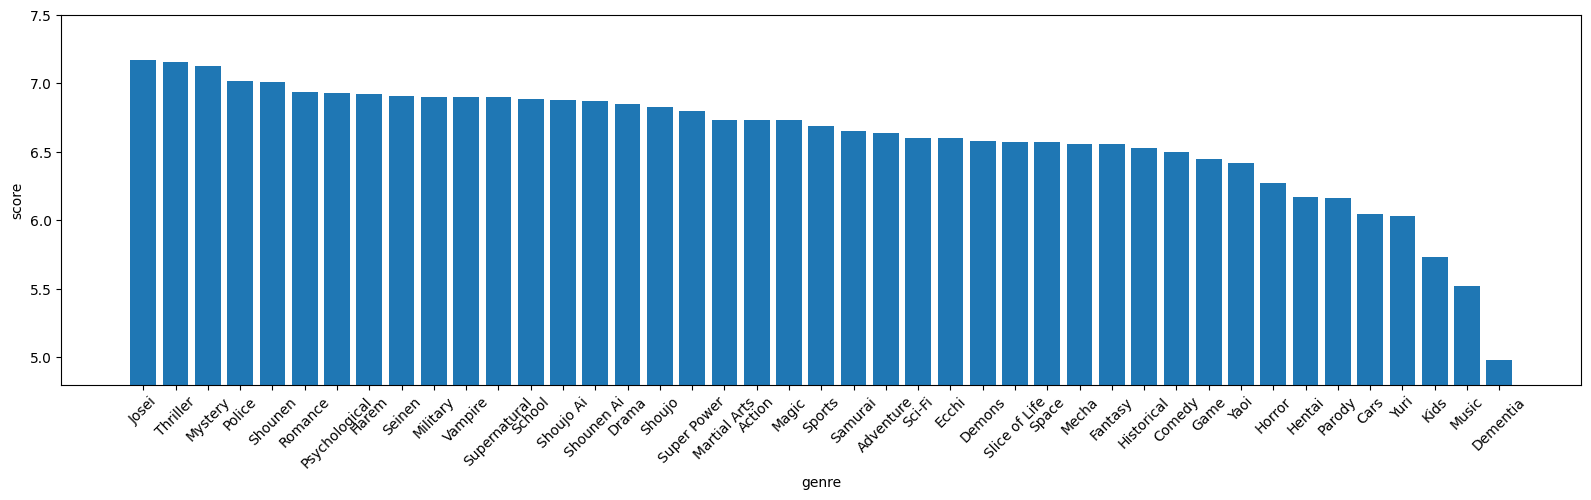

In [176]:
plt.bar(genre_score.index,genre_score.values)
plt.subplots_adjust(right=2.5)
plt.xticks(rotation=45)
plt.ylim(4.8,7.5)
plt.ylabel("score")
plt.xlabel("genre")
plt.show()

Let's create some more plots. First we will need to merge the 2 pandas series

In [177]:
merged_anime_data = pd.merge(genre_score,count_of_genre, left_index=True, right_index=True)
merged_anime_data = merged_anime_data.rename(columns={"title":"frequency"})

In [178]:
merged_anime_data

,score,frequency
genre,,
Josei,7.17,81
Thriller,7.16,100
Mystery,7.13,606
Police,7.02,221
Shounen,7.01,1771
Romance,6.94,1634
Psychological,6.93,288
Harem,6.92,353
Seinen,6.91,698


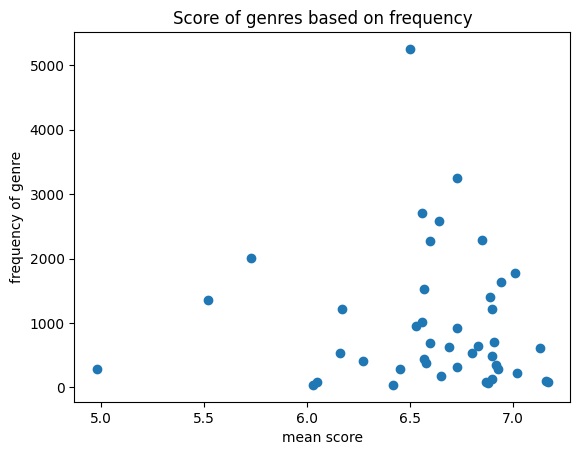

In [179]:
plt.scatter(merged_anime_data.score,merged_anime_data.frequency)
plt.xlabel("mean score")
plt.ylabel("frequency of genre")
plt.title("Score of genres based on frequency")
plt.show()

Well now, the question is: Does this plot tell us something? Does lower frequency mean better score? Not exactly. Although most genres with low frequency have a high score, that does not mean that it is 100% true. Let's explore the column score a bit broader.

Let's go back to our original dataframe and see whether the numbers of episodes affect the score. Let's just remove those 0 and 10 score from the anime dataframe

In [180]:
anime = anime[anime.score !=0] 

In [181]:
anime = anime[anime.score !=10] 

In [182]:
episodes_score = anime[["episodes","score"]]

I will use seaborn for better visualization

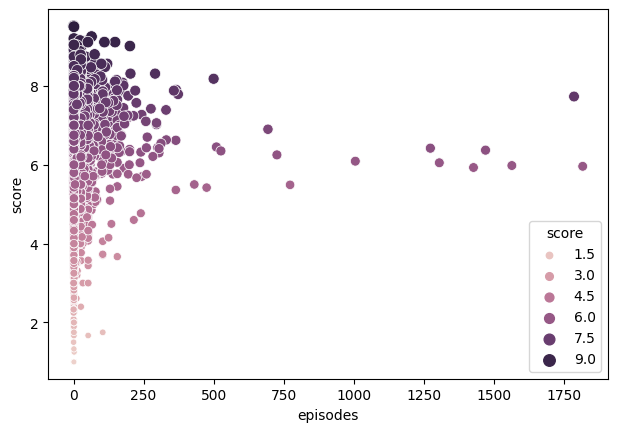

In [183]:
sns.scatterplot(data = episodes_score ,x ="episodes",y= "score",hue ="score",size ="score")
plt.subplots_adjust(right=1)

It's fine, but a lot of information is "lost" in this kind of presentation

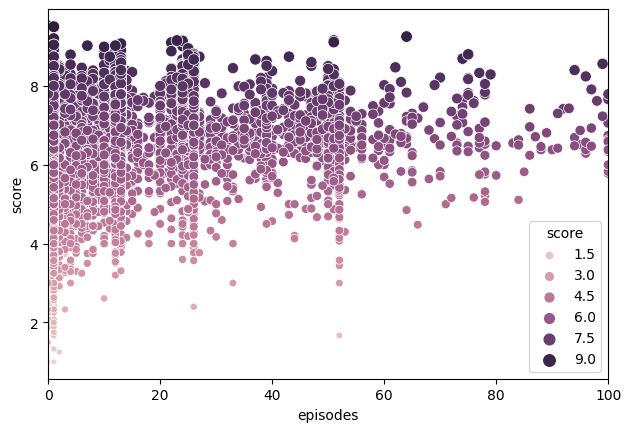

In [184]:
sns.scatterplot(data = episodes_score ,x ="episodes",y= "score",hue ="score",size ="score")
plt.subplots_adjust(right=1)
plt.xlim(0,100)
plt.show()

That's better. We can see that animes with score under 4 have mostly under 12 episodes. But still, that does not mean that the more the episodes the higher the score. Let's see the mean number score of each length of anime.

In [185]:
mean_score_episodes = episodes_score.groupby("episodes").score.mean()

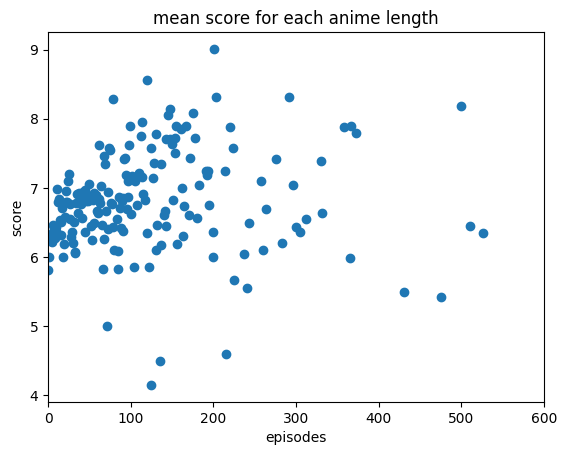

In [186]:
plt.scatter(mean_score_episodes.index,mean_score_episodes.values)
plt.xlabel("episodes")
plt.ylabel("score")
plt.xlim(0,600)
plt.title("mean score for each anime length")
plt.show()

In [187]:
episodes_score.episodes.corr(episodes_score.score, method="spearman")

0.30042642121078705

Well, as we can see there is almost no correlation between score and episodes. We used spearman correlation method, because of the nature of the data

Okay, so how does an anime have a good score? What are the factors? We saw earlier that most genres have a similiar score, the frequency of the genre also doesn't make a big difference. The number of episodes too. We have some more factors though. Let's explore the source, aired, rating and studio columns. After that we will find some "hidden gems".

In [188]:
def show_score_and_column(x_score):
    res = x_score.groupby(x_score.columns[0]).score.mean().sort_values(ascending=False)
    plt.barh(res.index,res.values)
    plt.xlabel(x_score.columns[1])
    plt.ylabel(x_score.columns[0])
    plt.show()

In [189]:
source_score = anime[["source","score"]]
date_score =anime[["aired","score"]]
rating_score = anime[["rating","score"]]
studio_score =anime[["studio","score"]]

We should first work on date_score and studio

In [190]:
def filter_aired(df_with_aired,only_year=True):
    df_with_aired.aired = df_with_aired.aired.str[10:20]
    df_with_aired = df_with_aired[df_with_aired.aired!="one, 'to':"]
    df_with_aired.aired = pd.to_datetime(df_with_aired.aired )
    if only_year:
        df_with_aired.aired = df_with_aired.aired.dt.year
        return df_with_aired
    else:
        return df_with_aired

In [191]:
date_score = filter_aired(date_score)

In [192]:
studio_score = studio_score.dropna()

In [193]:
list_of_studios = []
list_score = []
for studios,score in zip(studio_score.studio,studio_score.score):
    for studio in studios.split(","):
        list_score.append(score)
        list_of_studios.append(studio)

In [194]:
studio_score = pd.DataFrame(list_score,list_of_studios)

In [195]:
studio_score = studio_score.reset_index()

In [196]:
studio_score.columns = ["studio","score"]

In [197]:
studio_score

,studio,score
0,David Production,7.63
1,Gonzo,7.89
2,Satelight,7.55
3,Hal Film Maker,8.21
4,J.C.Staff,8.67
...,...,...
8936,Toei Animation,3.57
8937,Sanrio,4.57
8938,Toei Animation,4.33
8939,Toei Animation,7.00


In [198]:
studio_score.studio = studio_score.studio.str.strip()

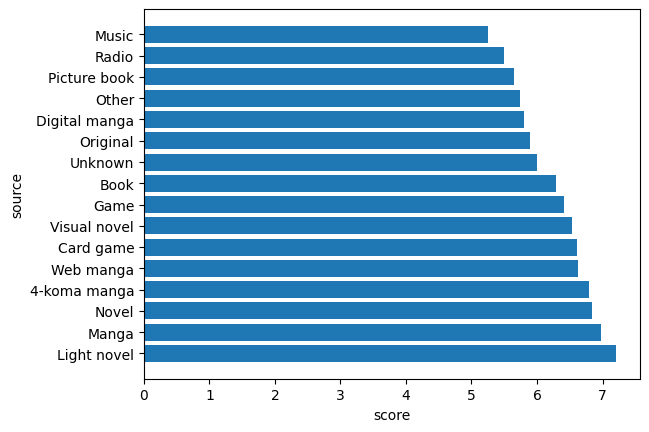

In [199]:
show_score_and_column(source_score)

Never heard of an anime based on a radio. We can see that light novels make the best anime.

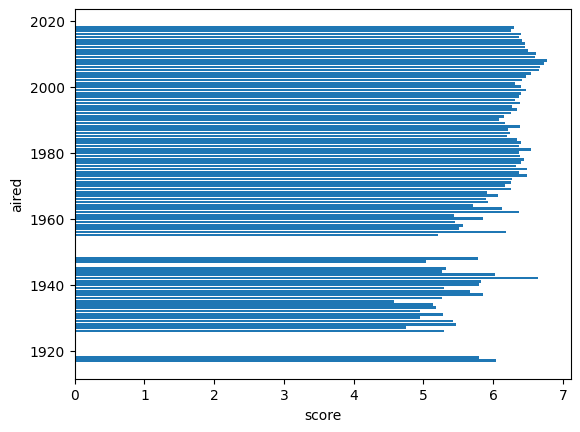

In [200]:
show_score_and_column(date_score)

This information is not that useful for now but it is very interesting when the anime industry has a break. See? We can gather infromation about historical events from a website for animes. Crazy :D. 

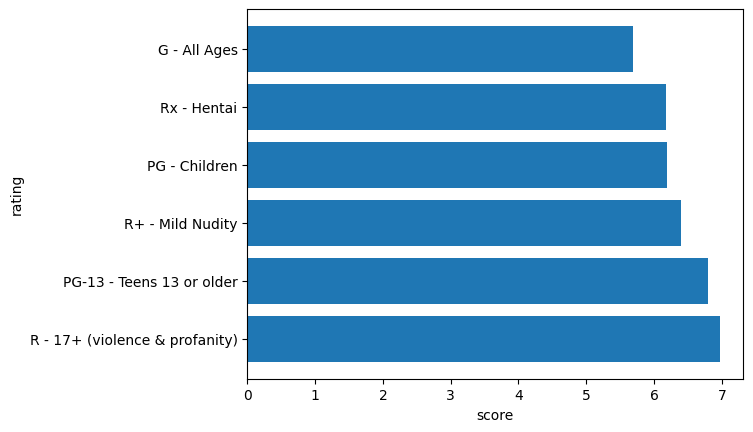

In [201]:
show_score_and_column(rating_score)

I'm even more suprised. Rx is somehow better rated than All ages animes.

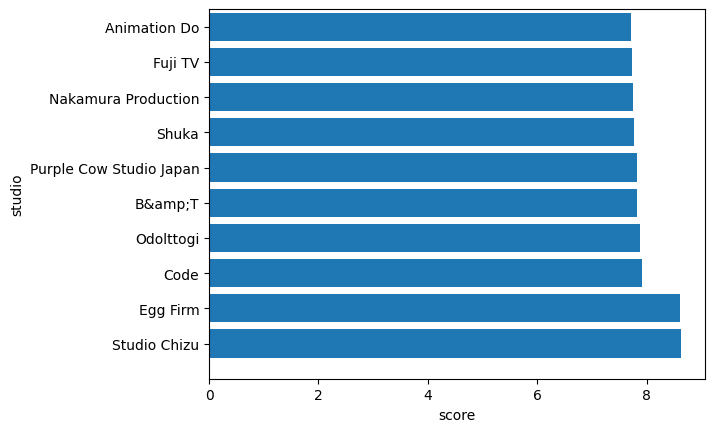

In [202]:
plt.ylim(-1,9.5)
show_score_and_column(studio_score)

Keep in mind that I seperated every studio like I did earlier with the genres. The problem with studios is that most of the times they work together and by seperating them we end up with a lot of small studios that help other bigger studios. These smaller studios (Egg Firm for example) have little to no original work. Studio Chizu has it's own work but only 3 animes. But if we don't seperate them we end up with a lot of studios creating a single anime. This data won't be even possible to plot :D.

Same goes for the producers. So let's make a conclusion out of this.

A light novel based anime that is rated 17+ with a genre josei, thriller or mystery would probably be a high rated anime. We also found that episodes and frequncy of the genre of the anime don't play any role in the score of it. Well let's find some hidden gems. This means an anime with a small amount of people that have seen it, but a high score

In [203]:
hidden_gems = anime[["members","score","title"]]

In [204]:
mean_score = hidden_gems.score.mean()
mean_members = hidden_gems.members.mean()

In [205]:
hidden_gems = hidden_gems[hidden_gems.score>mean_score]

In [206]:
con1 = hidden_gems.members<mean_members
hidden_gems = hidden_gems[con1]

In [207]:
hidden_gems.sort_values("score",ascending=False).head(10)

,members,score,title
14403,357,9.52,Dokidoki Little Ooyasan
14208,41,9.50,Hashire John
14454,35,9.50,Tat-chan - Momo-chan no Fushigina Taiken
3129,73,9.20,Okaachan Gomen ne
14123,44,8.67,Ninja Tamamaru: Toukaidou Gojuusan-ji
10356,70,8.67,"Mirai e no Niji: Boku no Ojisan wa, Hansen-byou"
6385,21890,8.66,Pingu in the City
7521,74,8.60,Haha Uzura
6493,12457,8.60,Ashita no Joe 2
1127,18414,8.52,Gintama: Yorinuki Gintama-san on Theater 2D


okay but we got too underground. You see, in MAL anime with members under a certain number won't have a score. But in this dataframe things are different. Let's set a members value so we won't have animes with 30 people rating them.

In [208]:
con1 = hidden_gems.members<mean_members
con2 = hidden_gems.members>2000
hidden_gems = hidden_gems[con1 & con2]

In [209]:
hidden_gems.sort_values("score",ascending=False).head(10)

,members,score,title
6385,21890,8.66,Pingu in the City
6493,12457,8.60,Ashita no Joe 2
1127,18414,8.52,Gintama: Yorinuki Gintama-san on Theater 2D
8268,13105,8.47,Natsume Yuujinchou Roku Specials
9693,10341,8.47,Detective Conan: Episode One - The Great Detec...
4324,18911,8.46,Major: World Series
686,22086,8.45,Romeo no Aoi Sora
13302,16251,8.38,Natsume Yuujinchou Go Specials
8251,19977,8.33,Gintama: Shinyaku Benizakura-hen
10784,16857,8.33,Major: Message


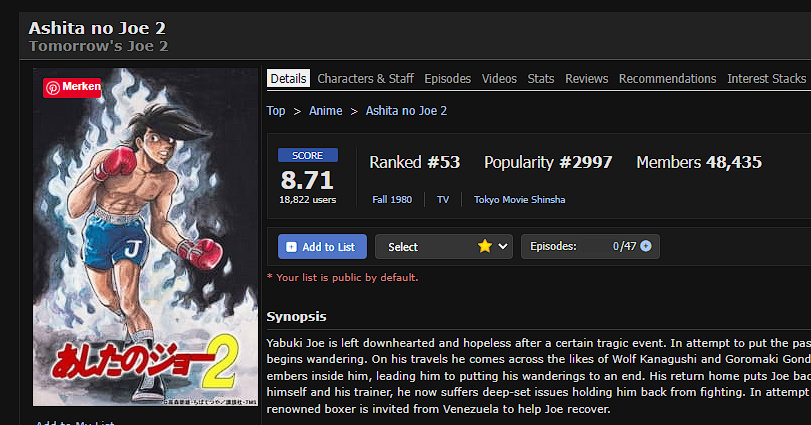 

The first one was a meme back then and that's why it is so highly rated. In 2023 it is not. But Ashita no Joe 2 is still the hidden gem of all. Romeo no Aoi Sora too. 


Let's look at the top 10 most popular anime and see if the brightness of their posters could tell us something

# Posters

In [210]:
most_popular = anime[["title","members","genre","rating"]].sort_values("members",ascending=False).head(10)

In [211]:
most_popular.title = most_popular.title.str.replace(":","") # easier for the name of the images, because they can't have : 

In [212]:
def get_mean_brightness(image):
    img = imread(f"anime info\posters\{image}")
    r,g,b = img[:,:,0]/3,img[:,:,1]/3,img[:,:,2]/3
    gray_img = r+g+b
    mean_brightness = gray_img.mean()
    return mean_brightness

In [213]:
name_bright = dict()
for name in os.listdir("anime info\posters"):
    name_bright[name[:-4]] = get_mean_brightness(name)

In [214]:
brightness_list = []
for title in most_popular.title:
     brightness_list.append(name_bright[title])

In [215]:
most_popular["brightness"] = brightness_list

In [216]:
most_popular.sort_values("brightness")

,title,members,genre,rating,brightness
7913,Death Note,1456378,"Mystery, Police, Psychological, Supernatural, ...",R - 17+ (violence & profanity),58.624943
1235,Tokyo Ghoul,1013138,"Action, Mystery, Horror, Psychological, Supern...",R - 17+ (violence & profanity),92.857969
8123,Shingeki no Kyojin,1345842,"Action, Military, Mystery, Super Power, Drama,...",R - 17+ (violence & profanity),97.317039
2555,Fullmetal Alchemist Brotherhood,1199091,"Action, Military, Adventure, Comedy, Drama, Ma...",R - 17+ (violence & profanity),107.744255
8863,One Punch Man,1020754,"Action, Sci-Fi, Comedy, Parody, Super Power, S...",R - 17+ (violence & profanity),113.886147
13726,Code Geass Hangyaku no Lelouch,986897,"Action, Military, Sci-Fi, Super Power, Drama, ...",R - 17+ (violence & profanity),116.732867
4504,Naruto,980265,"Action, Adventure, Comedy, Super Power, Martia...",PG-13 - Teens 13 or older,121.779267
2999,Steins;Gate,1010330,"Thriller, Sci-Fi",PG-13 - Teens 13 or older,131.889247
13606,Angel Beats!,1010771,"Action, Comedy, Drama, School, Supernatural",PG-13 - Teens 13 or older,151.550084
6296,Sword Art Online,1301616,"Action, Adventure, Fantasy, Game, Romance",PG-13 - Teens 13 or older,155.880842


Okay, so we can see that a mystery and psychological anime such as death note has a really low brightness, on the other hand something like Sword Art Online( romance and adventure) seems to be a lot brighter. Tokyo Ghoul is also a pretty dark anime and the poster can show that too. There are exceptions like Steins Gate, but if you search for the most popular poster of it, you can see that their faces are serious and the brightness comes only from their white clothing and the white buildings. I am trying to say that, a brightness of a poster doesn't tell much but we can make assumptions out of it :D. We also have a pretty clear border between PG 13 and 17+. 

We are done with the anime dataframe for now. Let's see what's going on with the users. After that we will make some predictions

# UserList

Using a cleaned version

In [217]:
users = pd.read_csv("anime info/users_cleaned.csv")

In [218]:
users.columns

Index(['username', 'user_id', 'user_watching', 'user_completed', 'user_onhold',
       'user_dropped', 'user_plantowatch', 'user_days_spent_watching',
       'gender', 'location', 'birth_date', 'access_rank', 'join_date',
       'last_online', 'stats_mean_score', 'stats_rewatched', 'stats_episodes'],
      dtype='object')

In [219]:
users.access_rank.unique()

array([nan])

We have more relevant information than our anime dataframe, but the access_rank column is empty, so we will be removing it.

In [220]:
users = users.drop(columns="access_rank")

Let's see which gender watches more anime.

In [221]:
users_male = users[users["gender"]=="Male"][["gender","user_days_spent_watching"]]

In [222]:
users_female = users[users["gender"]=="Female"][["gender","user_days_spent_watching"]]

In [223]:
users_female.user_days_spent_watching.mean() , users_male.user_days_spent_watching.mean() # days

(47.21273951760326, 69.64306482853127)

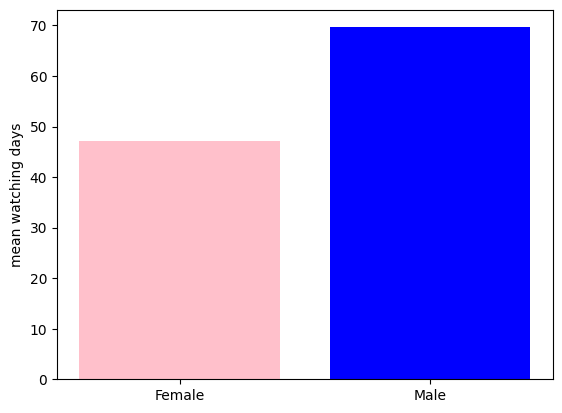

In [224]:
fig, ax = plt.subplots()
ax.bar("Female",users_female.user_days_spent_watching.mean(),color="pink")
ax.bar("Male",users_male.user_days_spent_watching.mean(),color="b")
ax.set_ylabel("mean watching days")
plt.show()

Well, everyone can put whatever they like on their plan to watch and some people do it so they can have more days. 69 days is a lot for a mean score. But we will keep it that way.

In [225]:
users_female.user_days_spent_watching.max()/365, users_male.user_days_spent_watching.max()/365  # to years so you can see how big the number is

(2.6100125887874177, 2.590913242009132)

the max values are huuge, but still possible 

I have always wonderd whether or not people with more anime experience give a lower score. Time to find out. First we will seperate both parties and remove the 0s from the scores, because this means that the person hasn't rated anything

In [226]:
days_score = users[["user_days_spent_watching","stats_mean_score"]]

In [227]:
days_score = days_score[days_score.stats_mean_score !=0]

In [228]:
days_score.user_days_spent_watching.mean() # new mean because of the upper line

62.04755197833199

In [229]:
lower_half = days_score.sort_values("user_days_spent_watching").iloc[0:len(days_score)//2]
higher_half = days_score.sort_values("user_days_spent_watching").iloc[len(days_score)//2:]

In [230]:
lower_half.stats_mean_score.mean() ,higher_half.stats_mean_score.mean()

(8.143971284672629, 7.684092608948941)

In [231]:
lower_half_2 = days_score[days_score.user_days_spent_watching <days_score.user_days_spent_watching.mean()]
higher_half_2 =days_score[days_score.user_days_spent_watching >days_score.user_days_spent_watching.mean()]

In [232]:
lower_half_2.stats_mean_score.mean() ,higher_half_2.stats_mean_score.mean()

(8.081878951029914, 7.638652705753914)

Okay, I made 2 ways for seperating in half, because I don't think that 62 days is a real mean value. The first way sorts and halves the length of the 2 parties, while the second way takes in the mean value of days spent watching. Either way, people with more days have less mean score.

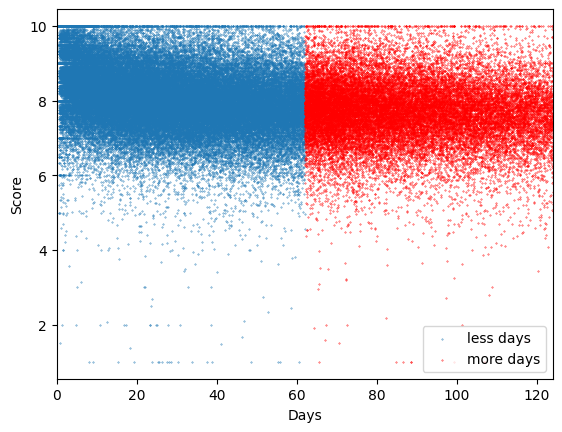

In [285]:
fig, ax2 = plt.subplots()
ax2.scatter(lower_half_2.user_days_spent_watching,lower_half_2.stats_mean_score, s=0.1)
ax2.scatter(higher_half_2.user_days_spent_watching,higher_half_2.stats_mean_score,s=0.1, c="r")
ax2.set_ylabel("Score")
ax2.set_xlabel("Days")
ax2.set_xlim(0,days_score.user_days_spent_watching.mean()*2) # setting to days_score.user_days_spent_watching.mean()*2 so we can have an equal representation of the 2 
plt.legend(["less days","more days"])
plt.show()

It's killing me to see how many 10/10 there are ( because it seems like a mistake), but we should keep that information, some people rate just one anime or prefer to rate what they love.

Now, we will be using geopy to find the longitude and latitude of the countires of some users. The problem here is that there are some countires that have a bit of strange names

In [234]:
location = users.location

In [235]:
location.iloc[18], location.iloc[19] # not countries as you can see

('somewhere really hot', 'Guess')

But we will handle that problem. It will be pretty slow , because geopy sends requests to a geocoding service. That's why we have a sample, after we get what we need we will add that information to a dataframe.

In [236]:
geolocator = Nominatim(user_agent="my_geocoder",timeout=10)

In [237]:
longitude = []
latitude = []
count = 150
for i in location:
    loc = geolocator.geocode(i)
    if loc:
        longitude.append(geolocator.geocode(i).longitude)
        latitude.append(geolocator.geocode(i).latitude)
    else:
        longitude.append(pd.NA)
        latitude.append(pd.NA)
    count-=1
    if count==0:
        break

In [238]:
len(longitude), len(latitude) # let's create a dataframe from the orginal users df, but with len(longitude) rows

(150, 150)

In [239]:
users_2 = users[:len(longitude)]

In [240]:
users_2["longitude"] = longitude
users_2["latitude"] = latitude

In [241]:
users_2 = users_2.dropna()

In [242]:
users_2

,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes,longitude,latitude
0,karthiga,2255153,3,49,1,0,0,55.091667,Female,"Chennai, India",1990-04-29 00:00:00,2013-03-03 00:00:00,2014-02-04 01:32:00,7.43,0.0,3391,80.270186,13.083694
1,Damonashu,37326,45,195,27,25,59,82.574306,Male,"Detroit,Michigan",1991-08-01 00:00:00,2008-02-13 00:00:00,2017-07-10 06:52:54,6.15,6.0,4903,-83.04664,42.331551
2,bskai,228342,25,414,2,5,11,159.483333,Male,"Nayarit, Mexico",1990-12-14 00:00:00,2009-08-31 00:00:00,2014-05-12 16:35:00,8.27,1.0,9701,-105.0,22.0
3,terune_uzumaki,327311,5,5,0,0,0,11.394444,Female,"Malaysia, Kuantan",1998-08-24 00:00:00,2010-05-10 00:00:00,2012-10-18 19:06:00,9.70,6.0,697,103.039502,3.856069
4,Bas_G,5015094,35,114,6,20,175,30.458333,Male,"Nijmegen, Nederland",1999-10-24 00:00:00,2015-11-26 00:00:00,2018-05-10 20:53:37,7.86,0.0,1847,5.863777,51.847495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Northen_Lights,388622,15,1055,49,0,90,182.088194,Female,"Russia, Krasnodar",1990-10-23 00:00:00,2010-09-27 00:00:00,2018-03-06 23:39:32,7.55,0.0,11319,39.026104,45.768401
146,Miau,126587,32,86,17,1,51,45.378472,Male,Vienna Austria,1990-03-04 00:00:00,2008-12-23 00:00:00,2010-10-24 18:54:00,7.44,0.0,2726,16.372504,48.208354
147,Stowaway,3349601,6,82,12,2,43,25.102778,Female,New Zealand,1997-09-05 00:00:00,2013-11-20 00:00:00,2016-11-27 00:18:00,7.11,34.0,1544,172.834408,-41.500083
148,Kishon,196712,8,62,0,0,203,14.468056,Male,New Zealand,1990-12-13 00:00:00,2009-06-20 00:00:00,2009-12-01 22:08:00,8.56,0.0,839,172.834408,-41.500083


Pretty nice, now let's create a map which shows us the gender of our users

In [243]:
users_2_male = users_2[users_2.gender=="Male"]
users_2_female = users_2[users_2.gender=="Female"]

In [244]:
#creating the map

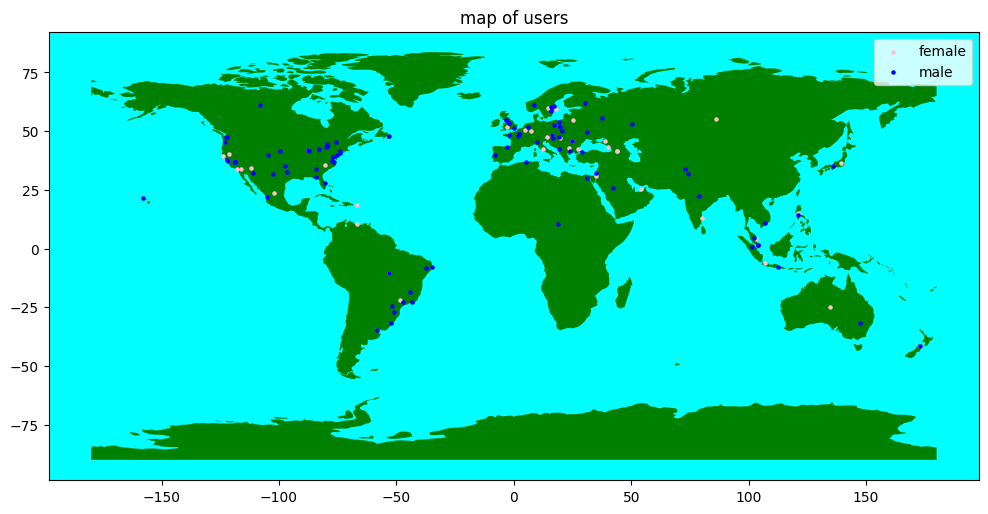

In [284]:
land = gpd.read_file(geodatasets.data.naturalearth.land.url)

fig = plt.figure(figsize = (12, 8))
ax = fig.gca()
land.plot(ax = ax, color = "green")
ax.set_facecolor("aqua")

points_f = [Point(xy) for xy in zip(users_2_female.longitude, users_2_female.latitude)]
points_m = [Point(xy) for xy in zip(users_2_male.longitude, users_2_male.latitude)]
users_gpd_f = gpd.GeoDataFrame(data=users_2_female,geometry= points_f)
users_gpd_m = gpd.GeoDataFrame(data=users_2_male,geometry= points_m)
users_gpd_f.plot(ax=ax,markersize=5,c="pink")
users_gpd_m.plot(ax=ax,markersize=5,c="blue")
plt.title("map of users")
plt.legend(["female","male"])
plt.show()

From these samples, we get that most people in MAL are from Europe and USA.

We are done now with the users dataframe. Let's get back to our anime dataframe again

# Prediction Model

Earlier we made an assumption of what a good anime is. We focused on its genre, source and rating. Now let's try to make a prediction model based on some information in our dataframe. The problem is that we won't be able to use the genre column. As you may remember we made a title_genre dataframe

In [246]:
title_genre

,genre,title,score
0,Comedy,Inu x Boku SS,7.63
1,Supernatural,Inu x Boku SS,7.63
2,Romance,Inu x Boku SS,7.63
3,Shounen,Inu x Boku SS,7.63
4,Comedy,Seto no Hanayome,7.89
...,...,...,...
41960,Kids,Gutchonpa Omoshiro Hanashi,5.50
41961,Comedy,Geba Geba Shou Time!,4.60
41966,Fantasy,Nippon Mukashibanashi: Sannen Netarou,6.00
41967,Kids,Nippon Mukashibanashi: Sannen Netarou,6.00


But as you can see, if we add here the score or the number of members of each anime, we will not get a right result because some titles repeat more than other (based on the numbers of their genres). So, we will predict based on the air-year, the members and the rating. We won't be using the studio column, because ,as with the genres, each anime has a couple of studios. For this model we will be using Random Forest

In [247]:
model_data = anime[["score","members","rating","aired"]]

In [248]:
model_data = filter_aired(model_data)

In [249]:
model_data

,score,members,rating,aired
0,7.63,283882,PG-13 - Teens 13 or older,2012
1,7.89,204003,PG-13 - Teens 13 or older,2007
2,7.55,70127,PG - Children,2008
3,8.21,93312,PG-13 - Teens 13 or older,2002
4,8.67,182765,PG-13 - Teens 13 or older,2012
...,...,...,...,...
14465,6.60,90,G - All Ages,1993
14466,4.57,24,PG-13 - Teens 13 or older,2017
14473,5.50,76,G - All Ages,1987
14474,4.60,90,G - All Ages,1986


We will shorten the names of the ratings, so when we test the model, it would be easier

In [250]:
model_data = model_data[model_data.score<9.20]

In [251]:
model_data.rating.replace({"G - All Ages":"G","PG - Children":"PG","PG-13 - Teens 13 or older":"PG 13","R - 17+ (violence & profanity)":"R","R+ - Mild Nudity":"R+",
                         "Rx - Hentai":"Rx"},inplace=True)

In [252]:
model_data[model_data.rating.isna()]

,score,members,rating,aired
67,3.44,361,NaN,2016
84,5.73,412,NaN,1997
86,5.86,313,NaN,2017
209,7.05,170,NaN,1988
273,5.28,188,NaN,2000
...,...,...,...,...
14229,5.14,99,NaN,1986
14258,7.00,14,NaN,2014
14292,5.60,43,NaN,2017
14344,5.71,34,NaN,1988


We have some NaN values, we can just get rid of them, because we really can't put a rating on them. Either way they play a small part in our model

In [253]:
model_data = model_data.dropna()

We will use label encoding to  transform our categorical data (rating) to numerical. We use label encoding because it is more suitable for trees and we have a somewhat hierarchy


In [254]:
label_encoder = LabelEncoder()

In [255]:
model_data["encoded_rating"] = label_encoder.fit_transform(model_data["rating"])

In [256]:
model_data

,score,members,rating,aired,encoded_rating
0,7.63,283882,PG 13,2012,2
1,7.89,204003,PG 13,2007,2
2,7.55,70127,PG,2008,1
3,8.21,93312,PG 13,2002,2
4,8.67,182765,PG 13,2012,2
...,...,...,...,...,...
14465,6.60,90,G,1993,0
14466,4.57,24,PG 13,2017,2
14473,5.50,76,G,1987,0
14474,4.60,90,G,1986,0


In [257]:
X = model_data[["aired"]]  #input
y = model_data["score"] #output

In [258]:
rating_encoding_dict = {}
for i in range(len(model_data.rating.unique())):
    rating_encoding_dict[model_data.rating.unique()[i]] = model_data.encoded_rating.unique()[i]

In [259]:
rating_encoding_dict # for our test

{'PG 13': 2, 'PG': 1, 'G': 0, 'R+': 4, 'R': 3, 'Rx': 5}

Let's normalize the values of our members columns

In [260]:
memb = model_data["members"].array.reshape(-1,1)

In [261]:
scaler = MinMaxScaler()
scaler.fit(memb)
normalized_members = scaler.transform(memb)

In [262]:
#I added this features now, so our test would run without needing more code as it is having now

In [263]:
X["members"] = normalized_members   
X["encoded_rating"] = model_data.encoded_rating

In [264]:
X

,aired,members,encoded_rating
0,2012,0.194918,2
1,2007,0.140070,2
2,2008,0.048146,1
3,2002,0.064065,2
4,2012,0.125487,2
...,...,...,...
14465,1993,0.000056,0
14466,2017,0.000010,2
14473,1987,0.000046,0
14474,1986,0.000056,0


Nice, we have our input features ready for work.

In [265]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)  #splitting the data into train and test

In [266]:
model = RandomForestRegressor(n_estimators=80, random_state=50)

In [267]:
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=80, random_state=50)

In [268]:
y_pred = model.predict(X_test)

In [269]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) # R squared score, so we know how good the predictions are

In [270]:
mse,r2

(0.5357805403623208, 0.5111304692402407)

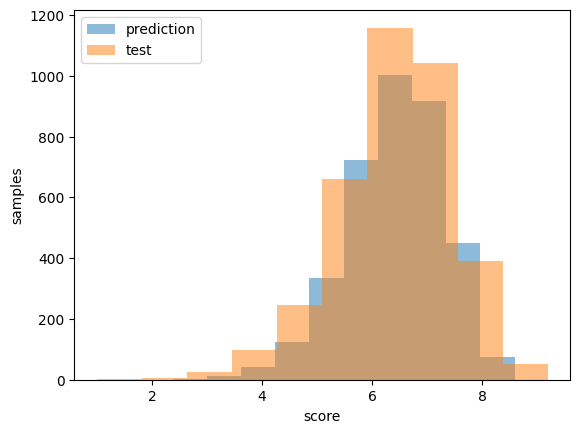

In [271]:
fig, pl = plt.subplots()
pl.hist(y_pred,alpha=0.5)
pl.hist(y_test,alpha=0.5)
pl.legend(["prediction","test"])
pl.set_xlabel("score")
pl.set_ylabel("samples")
plt.show()

As you know, this data is from 2018, let's see if the model can predict the score of some anime from 2019-2023. I will choose them from MAL manually.

In [272]:
def predict_df(aired,rating,members):
    test_data = pd.DataFrame({"aired":aired,"members":members})
    ratings_list = []
    for i in rating:
        ratings_list.append(rating_encoding_dict[i])

    test_data["encoded_rating"] = ratings_list
    return test_data

In [273]:
members_test = np.array([2429,20134,29648,495108,348261,1458]).reshape(-1,1)
normalized_members_test = scaler.transform(members_test)
normalized_members_test = normalized_members_test.reshape(len(members_test),)

In [274]:
data_from_MAL = predict_df([2022,2023,2023,2021,2016,2023],["G","PG","PG 13","R","R+","Rx"],normalized_members_test) #could not fint any R+ in recent years, so I took 2016

In [275]:
data_from_MAL

,aired,members,encoded_rating
0,2022,0.001662,0
1,2023,0.013819,1
2,2023,0.020351,2
3,2021,0.339954,3
4,2016,0.239123,4
5,2023,0.000995,5


In [276]:
model.predict(data_from_MAL)

array([5.8665  , 7.06575 , 7.2895  , 8.311625, 7.201625, 6.607625])

The actual ratings are: 6.43,  7.56,  6.1,  7.9,  6.3,  6.4

In [277]:
print(mean_squared_error([6.43, 7.56, 6.1, 7.9, 6.3, 6.4],model.predict(data_from_MAL)))

0.500366080729168


This test is just for fun, because it is really just too small to even make assumptions out of it.
But, when there is a new dataframe from 2023 or later, we can use this predict_df function to predict a lot more data. Of course we can scrape ourselves, but right now the time is limited :D. The only concern that I have is that the for loop will surely make the function slower, but it would still work.

And to top things off we will create a residual plot, so we can visually see how good is the model

In [278]:
residuals = y - model.predict(X)

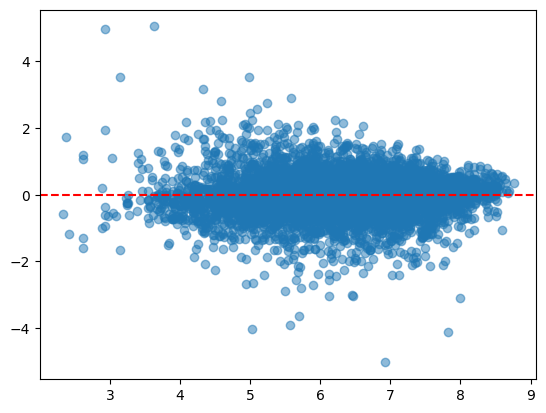

In [279]:
plt.scatter(model.predict(X),residuals,alpha=0.5)
plt.axhline(y=0,color="r",linestyle="--")
plt.show()

and just to compare the predicted and the real values

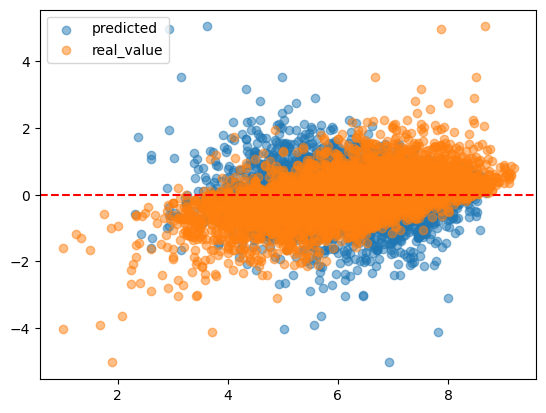

In [280]:
fig, a = plt.subplots()
a.scatter(model.predict(X),residuals,alpha=0.5)
a.scatter(y,residuals,alpha=0.5)
plt.axhline(y=0,color="r",linestyle="--")
plt.legend(["predicted","real_value"])
plt.show()

In [281]:
#Based on my experience it is good